# **I. Format Author**
- **Nama:** Isa Aulia Almadani
- **Email:** isaaulia17@gmail.com
- **ID Dicoding:** code_d_almdn

Done:
1. Mencari list pertanyaan dan menentukan 2 pertanyaan yang akan digunakan (kamis)
1. Melanjutkan mengurus assesing dan cleaning (jumat)

---

To-DO:
* Fokus gimana cara biar merge kedua tabel, saran pertama manfaatin product id jadi nanti bakal diamanin variabel itu. Merge dilakukan digathering atau eda? logikanya kalau di gathering terus gimana nasib jumlah keduanya? emang setara?
* lanjut data cleaning dan eda, Fokus kerjain  code keluar hasil hingga end baru perbaiki laporan
1. melanjutkan pemahaman tentang 3 probelm diword dengan melihat dicoding(jumat malam)
4. Atur visualisasi dan masukan ke stremlit


# kriteria kudu terpenuhi
* Memberikan dokumentasi menggunakan markdown/text cell pada notebook (.ipynb) untuk menjelaskan setiap tahapan analisis data.
* Membuat visualisasi data yang baik dan efektif dengan menerapkan prinsip desain dan integritas.
* Deploy dashboard ke dalam streamlit cloud.
* Menerapkan teknik analisis lanjutan seperti RFM analysis, geoanalysis, clustering, dll. (Tanpa menggunakan algoritma machine learning).

# **II. Pertanyaan Bisnis**

1. Seberapa berpengaruh nilai berat produk, lebar produk, tinggi produk, dan panjang produk terhadap harga produk?
2. Apa saja kategori produk yang nilai pengirimanya top 10 teratas

**Hipotesis**:
1. Apabila harga produk memiliki pengaruh yang signifikan terhadap berat produk lebar produk, tinggi produk, dan panjang produk maka hasil dapat mengharapkan adanya korelasi positif antara multi variabel tersebut. Artinya, hasil tersebut kemungkinan besar menunjukan harga yang lebih tinggi.
Sebaliknya apabila pengaruh multi variabel tersebut muncul korelasi negatif maka tidak ada keterkaitan yang signifikan.
2. Kualitas nilai pengiriman cenderung bervariasi di antara berbagai kategori produk.

## Import Semua Packages/Library yang Digunakan
Tujuan dari pemisahan library dengan kode sel lain agar visualisasi yang terlihat lebih rapi dan to the poin. Selain itu, jika kita mengalami kendala disetiap code sel, kita tidak perlu merunning ulang untuk kode sel yang tidak berkaitan sehingga lebih efisien.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# **III. Data Wrangling**
Ada 3 tahapan yang termasuk dalam proses Data Wrangling, yaitu gathering data, assesing data, dan cleaning data.

###A. Gathering Data
Pada analisis yang dibutuhkan untuk menjawab kedua pertanyaan bisnis tersebut, kita perlu mengimport 2 dataset, yaitu order_dataset dan  order_payment.

In [ ]:
# Saran agar url github bisa langsung dibuka maka tambahkan ?raw=true karena file github berbentuk raw
url = 'https://github.com/Symphoen1x/DICODING-TASK-ASLI/blob/main/order_items_dataset.csv?raw=true'
order_ds = pd.read_csv(url)

In [ ]:
order_ds.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
url4 = 'https://github.com/Symphoen1x/DICODING-TASK-ASLI/blob/main/products_dataset.csv?raw=true'
produk_ds = pd.read_csv(url4)


In [ ]:
produk_ds.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


###B. Assessing Data
Tahap assesing/penilaian kali ini bertujuan untuk menganalisis bagaimana kualiatas seluruh data yang ada dalam kedua dataset tersebut seperti bagaimana missing value yang ada, bagaimana keberadaan duplikasi data yang ada, bagaimana keberadaan outlier dari kedua dataset, perlukah mengganti nama variabel sesuai tujuan, bagaimana kesesuaian tipe variabel, dll.

**Penilaian order_dataset**

Petama, hal yang perlu dilakukan adalah melihat karakteristek data seperti keutuhan dan tipe data berdasarkan variabelnya.

In [ ]:
order_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Kedua, bagaimana keberadaan missing value pada dataset?

In [ ]:
print(order_ds.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Ketiga, bagaimana keberadaan duplikasi pada data?

In [ ]:
order_ds.shape


(112650, 7)

In [ ]:
duplicate_rows_detactor = order_ds[order_ds.duplicated()]
print(f"Number of duplicate by rows:{duplicate_rows_detactor.shape} detected")


Number of duplicate by rows:(0, 7) detected


keempat, keberadaan outlier pada dataset?


In [ ]:
order_ds.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


<Axes: xlabel='price'>

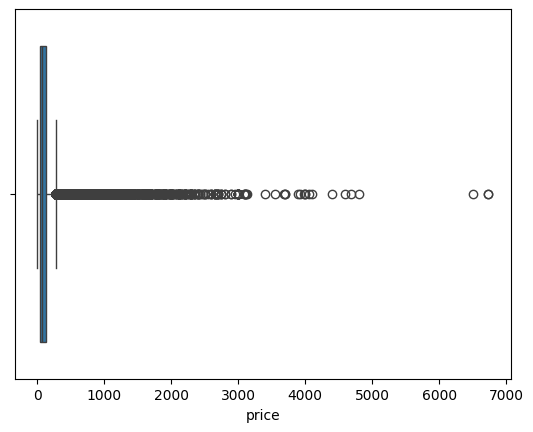

In [ ]:
sns.boxplot(x=order_ds['price'])


<Axes: xlabel='freight_value'>

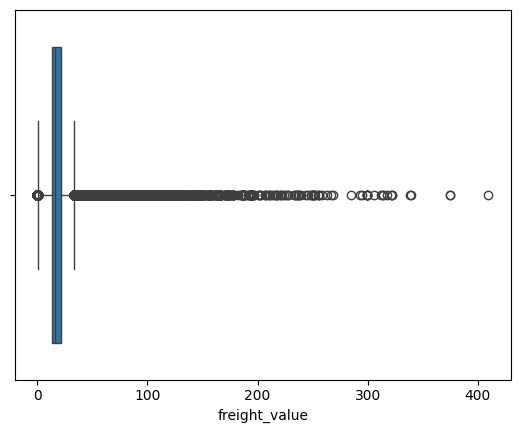

In [ ]:
sns.boxplot(x=order_ds['freight_value'])


**Notes**

Berdasarkan visualisasi di atas,

* Untuk dataset ini, kolom yang dibutuhkan adalah  price, product_id, dan freight_value. Maka akan dilakukan penghapusan kolom yang tidak berkaitan dengan pertanyaan analisis.
* Mungkin, penamaan variabel perlu diubah untuk menyesuaikan dengan informasi pada pertanyaan bisnis.
* Terlihat bahwa dataset tersebut bisa dibilang aman dari missing value dan duplikat data.
* Jika diperhatikan, terdapat banyak outlier high yang ada pada visualisasi kolom price dan freight_value diatas. Maka dari itu, akan dilakukan teknik pembersihan outlier di tahap selanjutnya.


**Penilaian produk_dataset**

Petama, hal yang perlu dilakukan adalah melihat karakteristek data seperti keutuhan dan tipe data berdasarkan variabelnya.

In [ ]:
produk_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


kedua, bagaimana keberadaan missing value pada dataset?

In [ ]:
print(produk_ds.isnull().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


Ketiga, bagaimana keberadaan duplikasi pada data?

In [ ]:
produk_ds.shape

(32951, 9)

In [ ]:
duplicate_rows_detactor = produk_ds[produk_ds.duplicated()]

In [ ]:
print(f"Number of duplicate by rows:{duplicate_rows_detactor.shape} detected")

Number of duplicate by rows:(0, 9) detected


Keempat, bagaimana keberadaan outlier pada dataset?


In [ ]:
produk_ds.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


<Axes: xlabel='product_weight_g'>

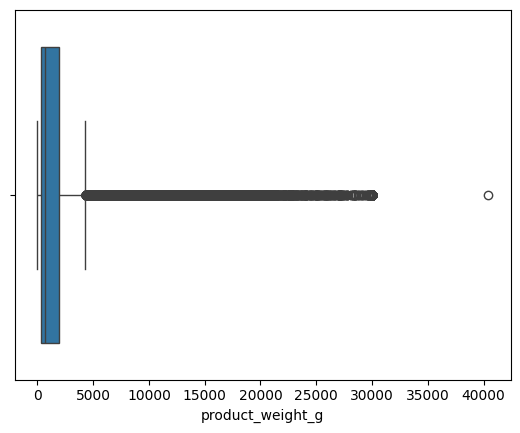

In [ ]:
sns.boxplot(x=produk_ds['product_weight_g'])

<Axes: xlabel='product_length_cm'>

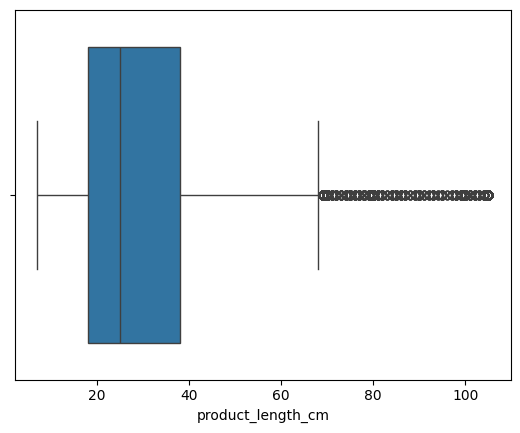

In [ ]:
sns.boxplot(x=produk_ds['product_length_cm'])


<Axes: xlabel='product_height_cm'>

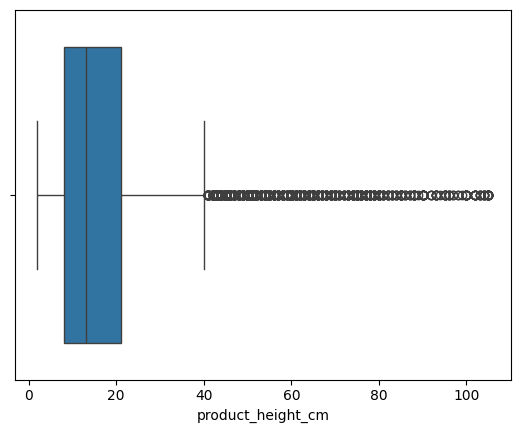

In [ ]:
sns.boxplot(x=produk_ds['product_height_cm'])


<Axes: xlabel='product_width_cm'>

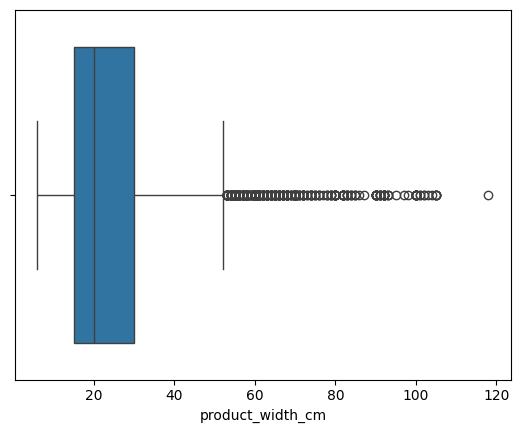

In [ ]:
sns.boxplot(x=produk_ds['product_width_cm'])



**Notes**

Berdasarkan visualisasi di atas,

* Terdapat banyak sekali missing value maka akan ditangani di tahap selanjutnya
* Kemudian, terlihat jelas bahwa dataset ini tidak memiliki duplikasi data dan dinyatakan aman.
* Untuk dataset ini, kolom yang dibutuhkan adalah
product_id, product_category_name, product_weight_g,	product_length_cm,product_height_cm,	product_width_cm. Maka dari itu, tahap berikutnya akan dilakukan penghapusan kolom yang tidak berkaitan dengan pertanyaan analisis.
* Selain itu, penamaan variabel perlu diubah untuk menyesuaikan dengan informasi pada pertanyaan bisnis.
* Jika diperhatikan, terdapat banyak outlier high yang ada pada visualisasi multi variate kolom diatas. Pada tahap selanjutnya outliers tersebut akan dibersihkan.

### Cleaning Data

**Pembersihan order_ds dataset**

Pertama, hal yang perlu dilakukan adalah mengubah nama kolom ke format penamaan yang lebih sesuai dengan pertanyaan analisis.

In [ ]:
order_ds = order_ds.rename(columns={"price" :  "Harga_Produk", "freight_value" : "Nilai_Pengiriman"})
order_ds.head(5)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,Harga_Produk,Nilai_Pengiriman
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Kedua, penghapusan nama kolom yang kurang relevan dengan pertanyaan bisnis.

In [ ]:
order_ds = order_ds.drop(['seller_id', 'order_id', 'order_item_id', 'shipping_limit_date'], axis=1)
order_ds.head(5)

,product_id,Harga_Produk,Nilai_Pengiriman
0,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,ac6c3623068f30de03045865e4e10089,199.90,18.14


Ketiga, bersihkan outliers yang ada pada kolom Harga_Produk dan Nilai_Produk.

<Axes: xlabel='Harga_Produk'>

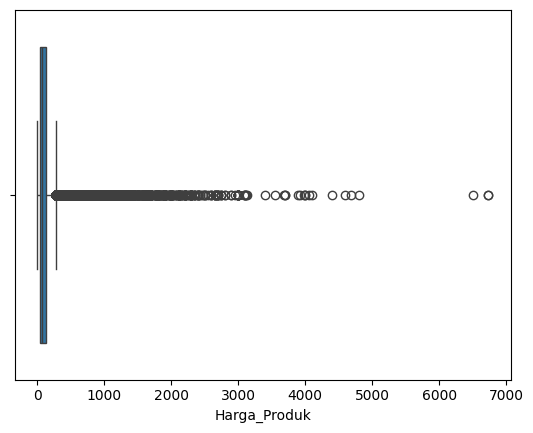

In [ ]:
sns.boxplot(x=order_ds['Harga_Produk'])


<Axes: xlabel='Nilai_Pengiriman'>

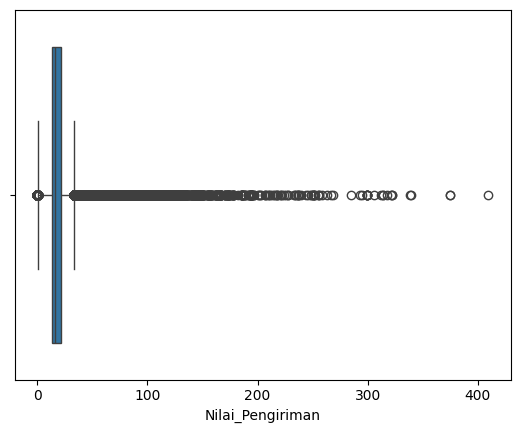

In [ ]:
sns.boxplot(x=order_ds['Nilai_Pengiriman'])

In [ ]:
# Q1 = order_ds['Nilai_Produk'].quantile(0.25)
# Q3 = order_ds['Nilai_Produk'].quantile(0.75)
# IQR = Q3 - Q1

# maximum = Q3 + (1.5 * IQR)
# minimum = Q1 - (1.5 * IQR)

# kondisi_lower_than = order_ds['Nilai_Produk'] < minimum
# kondisi_more_than = order_ds['Nilai_Produk'] > maximum

# # Ganti nilai yang tidak memenuhi kondisi dengan nilai maximum
# order_ds.loc[kondisi_lower_than, 'Nilai_Produk'] = maximum
# order_ds.loc[kondisi_more_than, 'Nilai_Produk'] = maximum


In [ ]:
Q1 = order_ds['Nilai_Pengiriman'].quantile(0.25)
Q3 = order_ds['Nilai_Pengiriman'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

kondisi_lower_than = order_ds['Nilai_Pengiriman'] < minimum
kondisi_more_than = order_ds['Nilai_Pengiriman'] > maximum

# Gunakan .mask() dengan argument untuk kondisi dan other secara bersamaan
order_ds['Nilai_Pengiriman'] = order_ds['Nilai_Pengiriman'].mask(cond=kondisi_lower_than | kondisi_more_than, other=maximum)


In [ ]:
Q1 = order_ds['Harga_Produk'].quantile(0.25)
Q3 = order_ds['Harga_Produk'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

kondisi_lower_than = order_ds['Harga_Produk'] < minimum
kondisi_more_than = order_ds['Harga_Produk'] > maximum

# Gunakan .mask() dengan argument untuk kondisi dan other secara bersamaan
order_ds['Harga_Produk'] = order_ds['Harga_Produk'].mask(cond=kondisi_lower_than | kondisi_more_than, other=maximum)


<Axes: xlabel='Nilai_Pengiriman'>

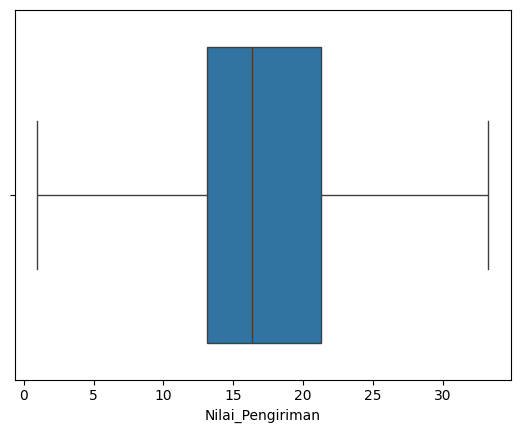

In [ ]:
sns.boxplot(x=order_ds['Nilai_Pengiriman'])


<Axes: xlabel='Harga_Produk'>

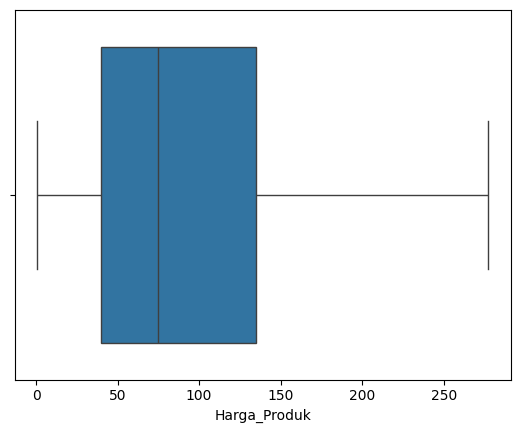

In [ ]:
sns.boxplot(x=order_ds['Harga_Produk'])

**Notes**

Berdasarkan hasil cleaning data di atas,

* Perubahan nama kolom yang sesuai pertanyaan bisnis sudah dilakukan
* Penghapusan kolom yang kurang relevan juga sudah selesai
* Penanganan outliers dari kolom Harga_Produk dan Nilai_Produk berjalan lancar.

**Pembersihan produk_ds dataset**

Pertama, tahapan yang perlu dilakukan adalah mengubah nama kolom ke format yang sesuai dengan pertanyaan analisis.

In [ ]:
produk_ds = produk_ds.rename(columns={"product_category_name" : "Kategori_Produk", "product_weight_g" :  "Berat_Produk", "product_length_cm" : "Panjang_Produk", "product_height_cm":"Tinggi_Produk", "product_width_cm": "Lebar_Produk"})
produk_ds.head(5)


,product_id,Kategori_Produk,product_name_lenght,product_description_lenght,product_photos_qty,Berat_Produk,Panjang_Produk,Tinggi_Produk,Lebar_Produk
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Kedua, penghapusan nama kolom yang kurang relevan dengan pertanyaan bisnis.

In [ ]:
produk_ds = produk_ds.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty'], axis=1)
produk_ds.head(5)

,product_id,Kategori_Produk,Berat_Produk,Panjang_Produk,Tinggi_Produk,Lebar_Produk
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


Ketiga, mengatasi missing value yang ada pada semua kolom dengan bantuan .




In [ ]:
produk_ds.isna().sum()

product_id           0
Kategori_Produk    610
Berat_Produk         2
Panjang_Produk       2
Tinggi_Produk        2
Lebar_Produk         2
dtype: int64

In [ ]:
# produk_ds.dropna(axis=0, inplace=True)

In [ ]:
produk_ds.Kategori_Produk.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: Kategori_Produk, Length: 73, dtype: int64

In [ ]:
produk_ds.Kategori_Produk.fillna(value="cama_mesa_banho", inplace=True)

In [ ]:
produk_ds.dropna(axis=0, inplace=True)


In [ ]:
print(produk_ds.isnull().sum())


product_id         0
Kategori_Produk    0
Berat_Produk       0
Panjang_Produk     0
Tinggi_Produk      0
Lebar_Produk       0
dtype: int64


In [ ]:
produk_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32949 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       32949 non-null  object 
 1   Kategori_Produk  32949 non-null  object 
 2   Berat_Produk     32949 non-null  float64
 3   Panjang_Produk   32949 non-null  float64
 4   Tinggi_Produk    32949 non-null  float64
 5   Lebar_Produk     32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.8+ MB


keempat, pemberishan missing value berdasarkan visualisasi

<Axes: xlabel='Berat_Produk'>

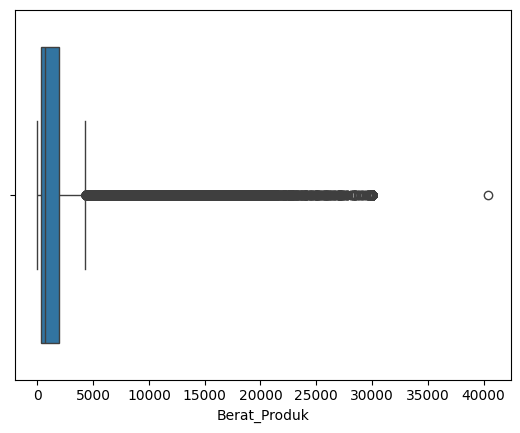

In [ ]:
sns.boxplot(x=produk_ds['Berat_Produk'])

<Axes: xlabel='Panjang_Produk'>

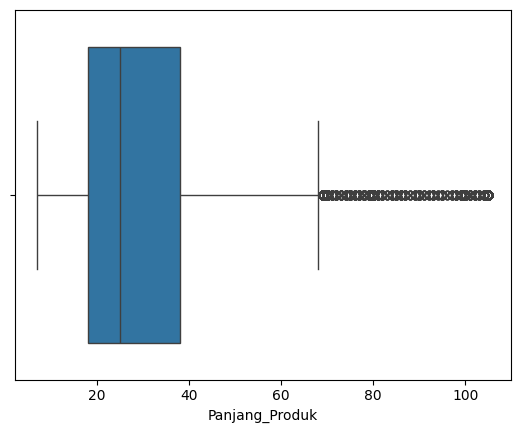

In [ ]:
sns.boxplot(x=produk_ds['Panjang_Produk'])


<Axes: xlabel='Tinggi_Produk'>

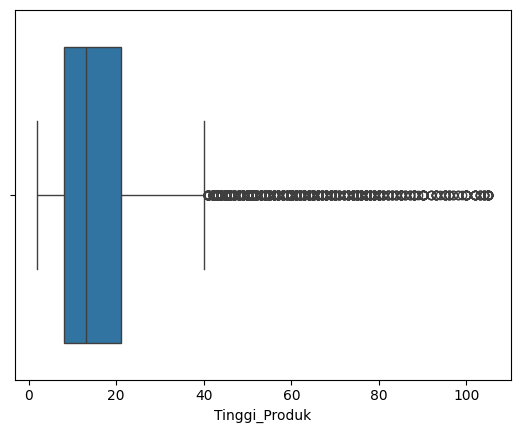

In [ ]:
sns.boxplot(x=produk_ds['Tinggi_Produk'])

<Axes: xlabel='Lebar_Produk'>

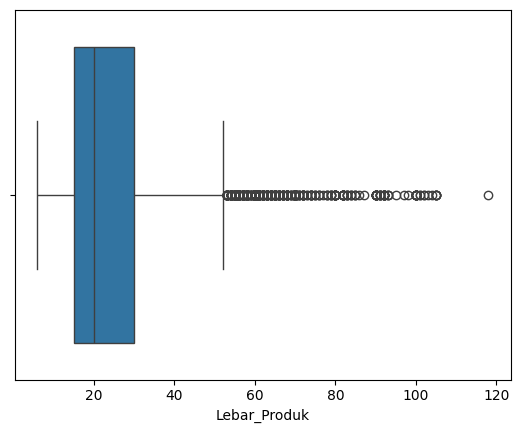

In [ ]:
sns.boxplot(x=produk_ds['Lebar_Produk'])

In [ ]:
Q1 = produk_ds['Berat_Produk'].quantile(0.25)
Q3 = produk_ds['Berat_Produk'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

kondisi_lower_than = produk_ds['Berat_Produk'] < minimum
kondisi_more_than = produk_ds['Berat_Produk'] > maximum

# Gunakan .mask() dengan argument untuk kondisi dan other secara bersamaan
produk_ds['Berat_Produk'] = produk_ds['Berat_Produk'].mask(cond=kondisi_lower_than | kondisi_more_than, other=maximum)


In [ ]:
Q1 = produk_ds['Lebar_Produk'].quantile(0.25)
Q3 = produk_ds['Lebar_Produk'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

kondisi_lower_than = produk_ds['Lebar_Produk'] < minimum
kondisi_more_than = produk_ds['Lebar_Produk'] > maximum

# Gunakan .mask() dengan argument untuk kondisi dan other secara bersamaan
produk_ds['Lebar_Produk'] = produk_ds['Lebar_Produk'].mask(cond=kondisi_lower_than | kondisi_more_than, other=maximum)


In [ ]:
Q1 = produk_ds['Tinggi_Produk'].quantile(0.25)
Q3 = produk_ds['Tinggi_Produk'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

kondisi_lower_than = produk_ds['Tinggi_Produk'] < minimum
kondisi_more_than = produk_ds['Tinggi_Produk'] > maximum

# Gunakan .mask() dengan argument untuk kondisi dan other secara bersamaan
produk_ds['Tinggi_Produk'] = produk_ds['Tinggi_Produk'].mask(cond=kondisi_lower_than | kondisi_more_than, other=maximum)


In [ ]:
Q1 = produk_ds['Panjang_Produk'].quantile(0.25)
Q3 = produk_ds['Panjang_Produk'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

kondisi_lower_than = produk_ds['Panjang_Produk'] < minimum
kondisi_more_than = produk_ds['Panjang_Produk'] > maximum

# Gunakan .mask() dengan argument untuk kondisi dan other secara bersamaan
produk_ds['Panjang_Produk'] = produk_ds['Panjang_Produk'].mask(cond=kondisi_lower_than | kondisi_more_than, other=maximum)


<Axes: xlabel='Berat_Produk'>

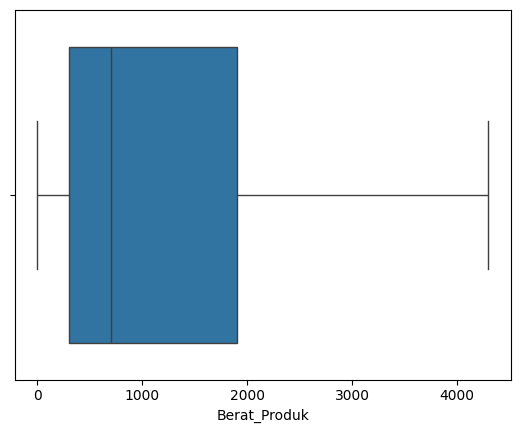

In [ ]:
sns.boxplot(x=produk_ds['Berat_Produk'])

<Axes: xlabel='Lebar_Produk'>

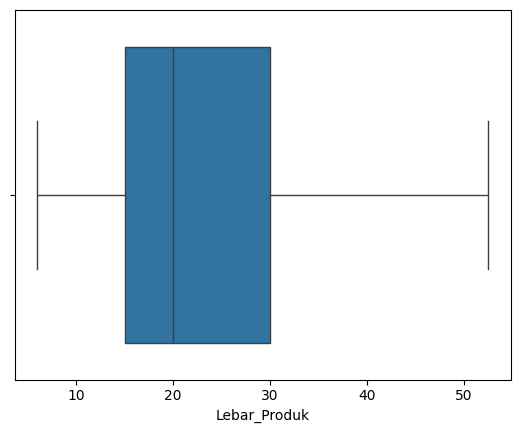

In [ ]:
sns.boxplot(x=produk_ds['Lebar_Produk'])

<Axes: xlabel='Tinggi_Produk'>

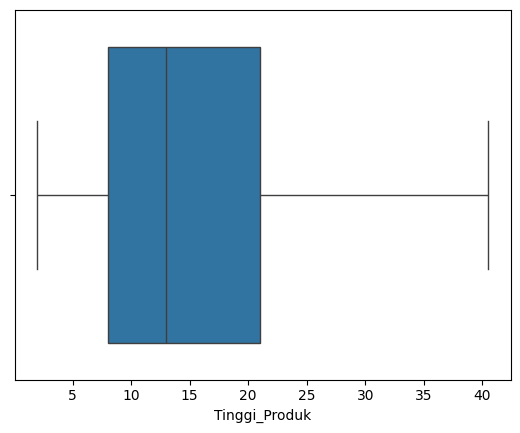

In [ ]:
sns.boxplot(x=produk_ds['Tinggi_Produk'])

<Axes: xlabel='Panjang_Produk'>

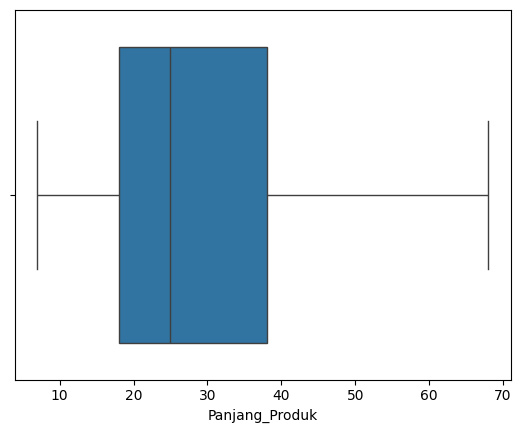

In [ ]:
sns.boxplot(x=produk_ds['Panjang_Produk'])

**Notes**

Berdasarkan hasil cleaning data di atas,

* Perubahan nama kolom yang sesuai pertanyaan bisnis sudah dilakukan
* Penghapusan kolom yang kurang relevan juga sudah selesai
* Penanganan outliers dari kolom Berat_Produk, Lebar_Produk, Panjang_Produk, dan Tinggi_Produk berjalan lancar. Penanganan tersebut meliputi proses visualisasi before cleaning dimana terlihat banyaknya outlier. Kemudian tahap mencari nilai IQR sebagai penentu nilai ambang bawah dan atas penanganan outlier. Selanjutnya terdapat proses pembersihan outlier dengan bantuan .mask().Terakhir, proses visualisasi after cleaning untuk melihat hasil.

## Exploratory Data Analysis (EDA)
Proses tahapan yang akan dilakukan:
* Tahap eksplorasi dataframe
* Tahap pivot table variabel berdasarkan pertanyaan bisnis

**Tahap eksplorasi dataframe order_ds dan produk_ds**

In [ ]:
order_produk_ds = pd.merge(
    left=order_ds,
    right=produk_ds,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_produk_ds.head()

,product_id,Harga_Produk,Nilai_Pengiriman,Kategori_Produk,Berat_Produk,Panjang_Produk,Tinggi_Produk,Lebar_Produk
0,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0
1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,pet_shop,4300.0,50.0,30.0,40.0
2,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0,33.0
3,7634da152a4610f1595efa32f14722fc,12.99,12.79,perfumaria,200.0,16.0,10.0,15.0
4,ac6c3623068f30de03045865e4e10089,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0,30.0


In [ ]:
order_produk_ds.describe()

,Harga_Produk,Nilai_Pengiriman,Berat_Produk,Panjang_Produk,Tinggi_Produk,Lebar_Produk
count,112650.000000,112650.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,98.444222,17.970754,1336.435010,29.614053,15.633261,22.709652
std,75.923244,7.408421,1418.351605,14.331359,10.315629,10.634995
min,0.850000,0.980000,0.000000,7.000000,2.000000,6.000000
25%,39.900000,13.150000,300.000000,18.000000,8.000000,15.000000
50%,74.990000,16.320000,700.000000,25.000000,13.000000,20.000000
75%,134.900000,21.300000,1800.000000,38.000000,20.000000,30.000000
max,277.400000,33.255000,4300.000000,68.000000,40.500000,52.500000


**Notes:**
Jadi sudah terlihat bahwa dua datafrmae berhasil di merge dengan tipe how=left

**Tahap pivot table variabel untuk pertanyaan:  Seberapa berpengaruh nilai berat produk, lebar produk, tinggi produk, dan panjang produk terhadap harga produk?**



Pertama, pengelompokan beberapa kolom multivariate

In [ ]:
grouped_data = order_produk_ds.groupby(['Berat_Produk', 'Panjang_Produk', 'Tinggi_Produk', 'Lebar_Produk']).mean().reset_index()
print(grouped_data.head())

   Berat_Produk  Panjang_Produk  Tinggi_Produk  Lebar_Produk  Harga_Produk  \
0           0.0            30.0           25.0          30.0    118.687500   
1           2.0            11.0           11.0          52.0    151.230000   
2          25.0            45.0           18.0          35.0    129.900000   
3          50.0            13.0            9.0          11.0     59.900000   
4          50.0            16.0            2.0          11.0     24.511667   

   Nilai_Pengiriman  
0         22.115000  
1         22.941000  
2         17.143333  
3         22.610000  
4         13.503333  


<ipython-input-143-f6aa347129ab>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = order_produk_ds.groupby(['Berat_Produk', 'Panjang_Produk', 'Tinggi_Produk', 'Lebar_Produk']).mean().reset_index()


 Menghitung matriks korelasi antara kolom-kolom numerik yang ada dalam DataFrame order_produk_ds

In [ ]:
order_produk_ds[['Berat_Produk', 'Panjang_Produk', 'Tinggi_Produk', 'Lebar_Produk', 'Harga_Produk']].corr()

,Berat_Produk,Panjang_Produk,Tinggi_Produk,Lebar_Produk,Harga_Produk
Berat_Produk,1.000000,0.552664,0.555262,0.590480,0.433912
Panjang_Produk,0.552664,1.000000,0.216683,0.583838,0.225940
Tinggi_Produk,0.555262,0.216683,1.000000,0.319992,0.300237
Lebar_Produk,0.590480,0.583838,0.319992,1.000000,0.240915
Harga_Produk,0.433912,0.225940,0.300237,0.240915,1.000000


**Notes:**
* Tahap pengelompokan kolom berdasarkan pertanyaan bisnis bertujuan agar visualisasi dataframe terfokus pada informasi yang sesuai dengan pertanyaan.
* Kemudian, proses perhitungan matriks korelasi antara kolom-kolom numerik yang ada dalam DataFrame order_produk_ds juga dilakukan agar kita bisa mengetahui bagaimana nilai korelasi antar variabel multivariate.



**Tahap pivot table variabel untuk pertanyaan: Apa saja kategori produk yang nilai pengirimanya top 10 teratas**

Mencari informasi terkait kolom Nilai_Produk berasarkan kolom Kategori_Produk untuk nilai tertinggi dan terendah.

In [ ]:
kategori_terpilih = order_produk_ds.groupby('Kategori_Produk')['Nilai_Pengiriman'].sum().reset_index()

# Pengurutan berdasarkan total nilai produk secara menurun
kategori_terpilih = kategori_terpilih.sort_values(by='Nilai_Pengiriman', ascending=False)

# Memilih 10 kategori teratas
top_10_teratas = kategori_terpilih.head(10)
print(top_10_teratas)

           Kategori_Produk  Nilai_Pengiriman
13         cama_mesa_banho        220024.570
11            beleza_saude        164573.940
54        moveis_decoracao        156253.320
32           esporte_lazer        153082.335
44  informatica_acessorios        137662.275
72   utilidades_domesticas        127303.680
66      relogios_presentes        103686.460
40      ferramentas_jardim         88120.760
8               automotivo         80114.690
26              cool_stuff         73299.770


**Notes:**
* Proses mencari informasi spesifik untuk top 10 kolom dengan nilai pengiriman tertinggi selesai ditampilkan.
* Dengan menggunakan bantuan .sort() dan ascending=False urutan kolom sudah terurut dari atas ke bawah.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa berpengaruh nilai berat produk, lebar produk, tinggi produk, dan panjang produk terhadap harga produk?

,Berat_Produk,Panjang_Produk,Tinggi_Produk,Lebar_Produk,Harga_Produk
Berat_Produk,1.000000,0.552664,0.555262,0.590480,0.433912
Panjang_Produk,0.552664,1.000000,0.216683,0.583838,0.225940
Tinggi_Produk,0.555262,0.216683,1.000000,0.319992,0.300237
Lebar_Produk,0.590480,0.583838,0.319992,1.000000,0.240915
Harga_Produk,0.433912,0.225940,0.300237,0.240915,1.000000


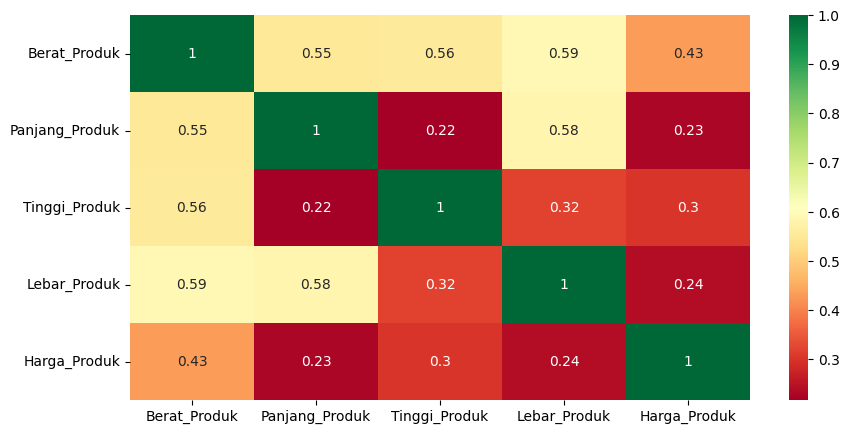

In [ ]:
plt.figure(figsize=(10,5))
c= order_produk_ds[['Berat_Produk', 'Panjang_Produk', 'Tinggi_Produk', 'Lebar_Produk', 'Harga_Produk']].corr()
sns.heatmap(c,cmap="RdYlGn",annot=True)
c

**Notes:**
* Visualisasi data dengan bantuan teknik lanjutan, yaitu heatmaps berhasil.
* Visualisasi ini mendukung warna untuk membedakan tingkat seberapa kuat dan lemah korelasi antar variabel multivariate.

### Pertanyaan 2: Apa saja kategori produk yang nilai pengirimanya top 10 teratas

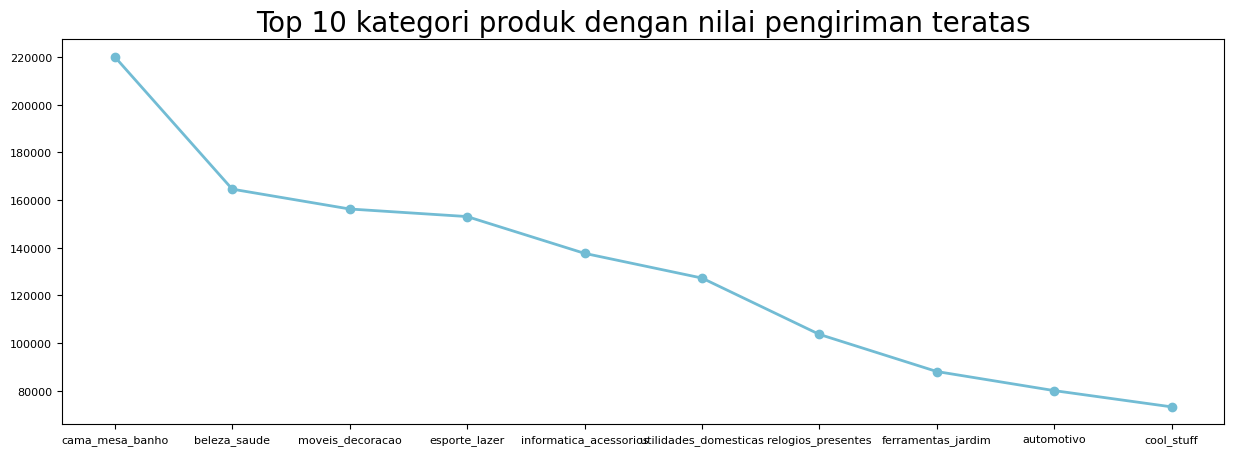

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(
    top_10_teratas["Kategori_Produk"],
    top_10_teratas["Nilai_Pengiriman"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Top 10 kategori produk dengan nilai pengiriman teratas", loc="center", fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Versi menggunakan Clustering Analisis Teknik

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-148-74d8162cb90f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_teratas['Cluster'] = kmeans.fit_predict(X)


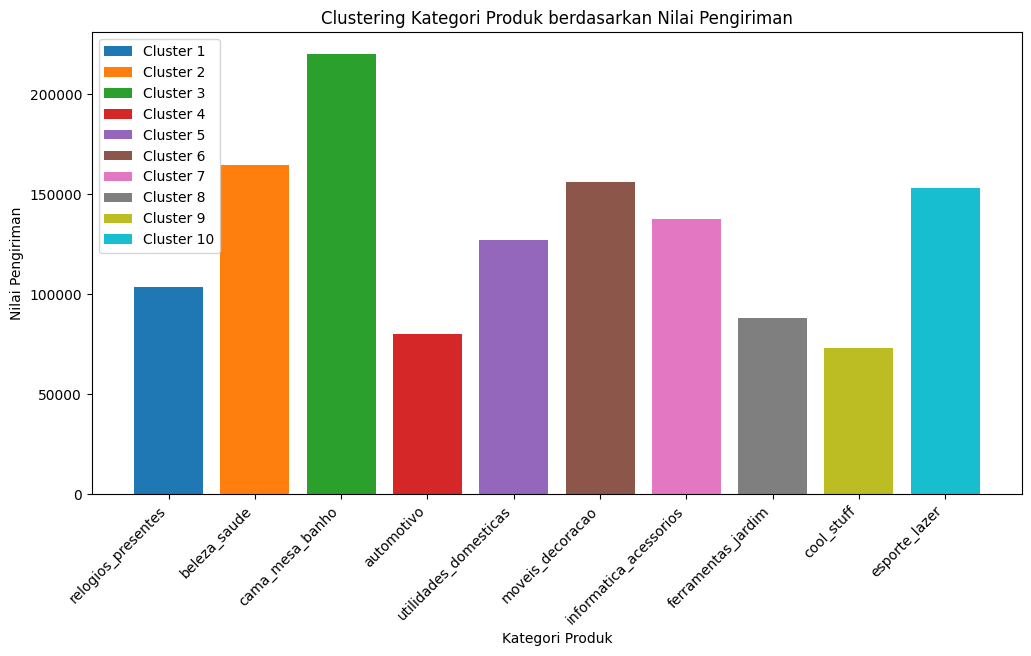

In [ ]:
X = top_10_teratas[['Nilai_Pengiriman']]

n_clusters = 10

# Melakukan K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
top_10_teratas['Cluster'] = kmeans.fit_predict(X)

top_10_teratas = top_10_teratas.sort_values(by='Nilai_Pengiriman', ascending=False)

# Data visualization untuk melihat hasil clustering
plt.figure(figsize=(12, 6))
for cluster_label in range(n_clusters):
    cluster_data = top_10_teratas[top_10_teratas['Cluster'] == cluster_label]
    plt.bar(cluster_data['Kategori_Produk'], cluster_data['Nilai_Pengiriman'], label=f'Cluster {cluster_label + 1}')

plt.title('Clustering Kategori Produk berdasarkan Nilai Pengiriman')
plt.xlabel('Kategori Produk')
plt.ylabel('Nilai Pengiriman')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

**Notes:**
* Pada visulaisasi untuk pertanyaan kedua, penggunaan teknik plot dan teknik lanjutan clustering berhasil dilakukan.
* Hasilnya benar benar menarik karena dapat memunculkan dengan variatif dan jelas

## Conclusion

**Conclution pertanyaan 1: Seberapa berpengaruh nilai berat produk, lebar produk, tinggi produk, dan panjang produk terhadap harga produk?**
* Baik, berdasarkan hasil analisis meliputi tahap gathering data, assesing data, cleaning data, EDA, dan Visualisasi data sudah ditemukan seberapa berpengaruh nilai berat produk, lebar produk, tinggi produk, dan panjang produk terhadap harga produk.
* Nilai berat produk (0.433912), panjang produk (0.225940), tinggi produk (0.300237), dan lebar produk (0.240915) memiliki koefisien korelasi positif terhadap harga produk.
* Variabel berat produk memiliki pengaruh yang lebih signifikan terhadap harga produk dibandingkan dengan variabel panjang, tinggi, dan lebar produk.
* Terdapat korelasi positif antara berat produk dan harga produk, menunjukkan bahwa semakin berat produk, semakin tinggi harga produk.
* Dalam konteks ini, bisnis dapat mempertimbangkan strategi penetapan harga yang lebih berfokus pada variabel berat produk, mengingat dampaknya yang lebih signifikan terhadap harga.
* Perhatikan bahwa variabel panjang, tinggi, dan lebar produk juga berpengaruh positif, sehingga dapat menjadi pertimbangan tambahan dalam penetapan harga.


**Conclution pertanyaan 2: Apa saja kategori produk yang nilai pengirimanya top 10 teratas**
* Terlihat jelas top 10 kategori produk berdasarkan nilai pengiriman tertinggi.
* Bisnis dapat mempertimbangkan untuk lebih fokus pada kategori produk dengan nilai pengiriman tertinggi, seperti cama_mesa_banho dan beleza_saude, untuk meningkatkan penjualan dan keuntungan.

In [149]:
order_produk_ds.to_csv("order_produk_ds.csv", index=False)

In [150]:
top_10_teratas.to_csv("top_10_teratas.csv", index=False)
